<a href="https://colab.research.google.com/github/FataPutra/Kriptografi/blob/main/DES_Putra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ALGORITMA DES
### NIM      : A11.2021.13905
### Nama     : Fata Dwi Putra
### Kelompok : A11.45UG

# ENCRYPT

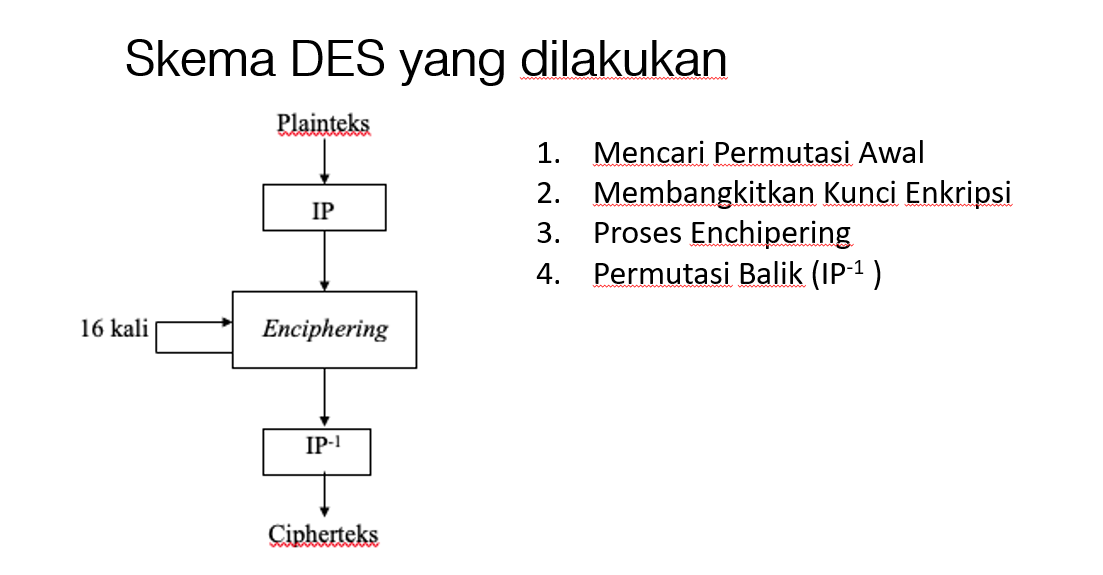

# INPUT PLAINTEXT KEMUDIAN UBAH MENJADI ASCII AGAR BISA DIUBAH MENJADI BILANGAN LAIN SEPERTI BINER DAN *HEXA*

In [ ]:
from posixpath import join
#join digunakan untuk menggabungkan (join) elemen-elemen dalam sebuah iterable (seperti list, tuple, atau set) menjadi satu string, dengan menggunakan string pemisah yang ditentukan.

#INPUT PLAINTEXT
input_pt = input("Masukkan Plaintext : ")
#PLAINTEXT = COMPUTER

# Fungsi untuk mengonversi huruf menjadi nilai ASCII
def text_to_ascii(text):
    ascii_values = [] #menyimpan nilai ASCII
    for char in text:
        ascii_values.append(ord(char)) # fungsi ord(char) digunakan untuk mengambil nilai ASCII kemudian nilai ASCII ini ditambahkan ke dalam list ascii_values menggunakan metode append.
    return ascii_values

pt_ascii = text_to_ascii(input_pt)
#MENAMPILKAN PLAIN TEXT KE ASCII
print("ASCII : ", pt_ascii)

Masukkan Plaintext : computer
ASCII :  [99, 111, 109, 112, 117, 116, 101, 114]


In [ ]:
def ascii_to_binary(ascii_values):
    binary_result = ''.join(format(char, '08b') for char in ascii_values) #Menggabungkan setiap nilai ASCII ke dalam representasi biner 8-bit menggunakan format '08b'
    return binary_result

In [ ]:
PT = ascii_to_binary(pt_ascii)
print("Biner: ", PT)

Biner:  0110001101101111011011010111000001110101011101000110010101110010


## PERMUTASI PLAIN TEXT DENGAN TABEL IP

In [ ]:
# array yang menampung tabel IP
IP = [
    58, 50, 42, 34, 26, 18, 10, 2,
    60, 52, 44, 36, 28, 20, 12, 4,
    62, 54, 46, 38, 30, 22, 14, 6,
    64, 56, 48, 40, 32, 24, 16, 8,
    57, 49, 41, 33, 25, 17, 9,  1,
    59, 51, 43, 35, 27, 19, 11, 3,
    61, 53, 45, 37, 29, 21, 13, 5,
    63, 55, 47, 39, 31, 23, 15, 7
]

#buat function untuk permutasi (FUNGSI INI AKAN SERING DIGUNAKAN UNTUK PROSES SELANJUTNYA)
def permutation(pt, ip):
    # pt: BILANGAN BINER
    # ip: BLOK PERMUTASI YANG DIGUNAKAN
    permuted = [list(pt)[i-1] for i in ip] #mengambil elemen dari list(pt) sesuai dengan indeks dalam tabel ip (dengan mengurangkan 1 dari indeks karena indeks biasanya dimulai dari 0), dan hasilnya ditempatkan dalam list permuted.
    return ''.join(permuted)

#permutasikan plaintext dengan IP
PT = permutation(PT, IP)

#MENAMPILKAN HASIL PERMUTASI DENGAN TABEL IP
print('HASIL dari permutasi dengan tabel IP :\n', PT)


HASIL dari permutasi dengan tabel IP :
 1111111110111000011101100101011100000000111111110000011010000011


#pecah hasil permutasi PlainText dengan TABEL IP menjadi masing masing 32 BIT


In [ ]:
# Langkah 2 pecah hasil permutasi PlainText dengan IP menjadi 2
def split_half(bits):
    # split binary digits menjadi dua bagian sama besar
    s = int(len(bits)/2) #S ADALAH HASIL BAGI 2 DARI PANJANG BILANGAN
    print("Hasil pembagian digits :",s)
    L = bits[:s] #L BERISI DARI PANJANG BIT PERTAMA / DARI KIRI SAMPAI S
    R = bits[s:] #R BERISI DARI PANJANG S HINGGA KE AKHIR
    return L, R

#MEMBAGI 2 HASIL DARI PERMUTASI TADI
L_n, R_n = split_half(PT)
print("L 0 :", L_n)
print("R 0 :", R_n)

Hasil pembagian digits : 32
L 0 : 11111111101110000111011001010111
R 0 : 00000000111111110000011010000011


# **Break**

# PEMBANGKITAN KUNCI EKSTERNAL

# MENGUBAH KEY MENJADI BINER

In [ ]:
input_key = input("Masukkan Inputan Key (HEXA) : ")
key = input_key.upper()
print('KEY : ',key)

Masukkan Inputan Key (HEXA) : 1234567890abcdef
KEY :  1234567890ABCDEF


In [ ]:
# key yang akan didibangkitkan
#key = '133457799BBCDFF1'
#print('KEY : ',key)


#ubah key dari hexa ke binary
# konversi hexa ke biner
def hex2bin(s):
	mp = {'0': "0000",
		'1': "0001",
		'2': "0010",
		'3': "0011",
		'4': "0100",
		'5': "0101",
		'6': "0110",
		'7': "0111",
		'8': "1000",
		'9': "1001",
		'A': "1010",
		'B': "1011",
		'C': "1100",
		'D': "1101",
		'E': "1110",
		'F': "1111"}
	bin = "" #menampung hasil konversi
	for i in range(len(s)): #melakukan perulangan sebanyak sepanjang S
		bin = bin + mp[s[i]] #mengambil karakter ke-i dari S (dengan s[i]) dan mencarinya dalam kamus mp untuk mendapatkan representasi biner yang sesuai, dan kemudian kita menambahkannya ke bin
	return bin

#MENGUBAH KE DALAM BENTUK BINER LALU DITAMPUNG DI K
K = hex2bin(key)
print('KEY Dalam Bentuk Biner : ',K)


KEY Dalam Bentuk Biner :  0001001000110100010101100111100010010000101010111100110111101111


# PERMUTASIKAN KEY DALAM BENTUK BINER DENGAN TABEL PC1

In [ ]:
# buat variabel array untuk menampung Kunci dari setiap putaran
K_list = []

#buat function untuk permutasi (FUNGSI INI AKAN SERING DIGUNAKAN UNTUK PROSES SELANJUTNYA)
def permutation(pt, ip):
    # pt: BILANGAN BINER
    # ip: BLOK PERMUTASI YANG DIGUNAKAN
    permuted = [list(pt)[i-1] for i in ip] #mengambil elemen dari list(pt) sesuai dengan indeks dalam tabel , lalu kurangkan indeksnya kurangkan 1 karena indeks biasanya dimulai dari 0), dan hasilnya ditempatkan dalam list permuted.
    return ''.join(permuted)

#deklarasi tabel PC1
PC1 = [
    57, 49, 41, 33, 25, 17, 9,
    1,  58, 50, 42, 34, 26, 18,
    10, 2,  59, 51, 43, 35, 27,
    19, 11, 3,  60, 52, 44, 36,
    63, 55, 47, 39, 31, 23, 15,
    7,  62, 54, 46, 38, 30, 22,
    14, 6,  61, 53, 45, 37, 29,
    21, 13, 5,  28, 20, 12, 4
]

#dimutasikan antara key dan tabel PC1 (dengan memanggil function permutation yang sudah dibuat tadi)
K_plus = permutation(K, PC1)
print('KEY SEBELUM PERMUTASI: ',K)
print('HASIL permutasi key dengan tabel PC1 : ', K_plus)


KEY SEBELUM PERMUTASI:  0001001000110100010101100111100010010000101010111100110111101111
HASIL permutasi key dengan tabel PC1 :  11110000110011001010101000011010010111000110111010001111


# Bagi menjadi 2 dari hasil permutation key dengan PC1



In [ ]:
n_rounds = 16 #adalah jumlah perputaran yang akan di lakukan
print('dibagi menjadi 2')

#MEMBAGI 2 KEY HASIL PERMUTASI DENGAN TABEL PC1
C_n, D_n = split_half(K_plus)

print('C 0 ', C_n)
print('D 0 ', D_n)

dibagi menjadi 2
Hasil pembagian digits : 28
C 0  1111000011001100101010100001
D 0  1010010111000110111010001111


## PROSES PERGESERAN BIT SEBANYAK 16 X

In [ ]:
# buat variabel untuk menampung sisi kiri dan kanan dari hasi permutasi dengan tabel PC1
C_list = []
D_list = []

print('PROSES PERGESERAN BIT')
print('Round 0 ')
print('C 0\t',C_n)
print('D 0\t',D_n)
#print('--------------------------------------------------------------------------------------------------------')
#print('C 0 D 0 ',K_plus)
print('========================================================================================================')

for i  in range(n_rounds):
  #ATURAN PERGESERAN
  print('Round', i+1)
  if (i == 0) or (i == 1) or (i == 8) or (i == 15): #ATURAN JIKA PERPUTARAN KE 1 ,2 ,9 , DAN 16 ITU SATU PUTARAN DAN SELAIN ITU GESER 2 PUTARAN
        C_n = C_n[1:]+C_n[:1] #mengambil elemen-elemen dalam bits mulai dari indeks 1 hingga akhir urutan , lalu ditambah mengambil bits dari index awal hingga 1
        D_n = D_n[1:]+D_n[:1]
  else:
        C_n = C_n[2:]+C_n[:2]  #mengambil elemen-elemen dalam bits mulai dari indeks 2 hingga akhir urutan , lalu ditambah mengambil bits dari index awal hingga 2
        D_n = D_n[2:]+D_n[:2]

  print('C',i+1,'\t',C_n)
  print('D',i+1,'\t',D_n)
  C_list.append(C_n) #SETELAH C_n di geser setelah itu ditampung di C_LIST
  D_list.append(D_n) #SETELAH D_n di geser setelah itu ditampung di D_LIST
  print('========================================================================================================')

PROSES PERGESERAN BIT
Round 0 
C 0	 1111000011001100101010100001
D 0	 1010010111000110111010001111
Round 1
C 1 	 1110000110011001010101000011
D 1 	 0100101110001101110100011111
Round 2
C 2 	 1100001100110010101010000111
D 2 	 1001011100011011101000111110
Round 3
C 3 	 0000110011001010101000011111
D 3 	 0101110001101110100011111010
Round 4
C 4 	 0011001100101010100001111100
D 4 	 0111000110111010001111101001
Round 5
C 5 	 1100110010101010000111110000
D 5 	 1100011011101000111110100101
Round 6
C 6 	 0011001010101000011111000011
D 6 	 0001101110100011111010010111
Round 7
C 7 	 1100101010100001111100001100
D 7 	 0110111010001111101001011100
Round 8
C 8 	 0010101010000111110000110011
D 8 	 1011101000111110100101110001
Round 9
C 9 	 0101010100001111100001100110
D 9 	 0111010001111101001011100011
Round 10
C 10 	 0101010000111110000110011001
D 10 	 1101000111110100101110001101
Round 11
C 11 	 0101000011111000011001100101
D 11 	 0100011111010010111000110111
Round 12
C 12 	 010000111110000110011

# GABUNGKAN Ci dan Di

In [ ]:
# Membuat list CD yang berisi gabungan dari C_list dan D_list
CD_list = []#LIST untuk menampung gabungan C DAN D
print('GABUNGAN C DAN D')
for i in range(len(C_list)):
  CD = C_list[i] + D_list[i]  # Gabungkan C_list dan D_list untuk setiap indeks
  CD_list.append(CD)
  # Sekarang CD_list berisi hasil penggabungan C_list dan D_list
  print('C',i+1,'D',i+1,' ',CD)

GABUNGAN C DAN D
C 1 D 1   11100001100110010101010000110100101110001101110100011111
C 2 D 2   11000011001100101010100001111001011100011011101000111110
C 3 D 3   00001100110010101010000111110101110001101110100011111010
C 4 D 4   00110011001010101000011111000111000110111010001111101001
C 5 D 5   11001100101010100001111100001100011011101000111110100101
C 6 D 6   00110010101010000111110000110001101110100011111010010111
C 7 D 7   11001010101000011111000011000110111010001111101001011100
C 8 D 8   00101010100001111100001100111011101000111110100101110001
C 9 D 9   01010101000011111000011001100111010001111101001011100011
C 10 D 10   01010100001111100001100110011101000111110100101110001101
C 11 D 11   01010000111110000110011001010100011111010010111000110111
C 12 D 12   01000011111000011001100101010001111101001011100011011101
C 13 D 13   00001111100001100110010101010111110100101110001101110100
C 14 D 14   00111110000110011001010101001111010010111000110111010001
C 15 D 15   11111000011001100101010

# PERMUTASIKAN HASIL GABUNGAN Ci dan Di dengan TABEL PC 2

In [ ]:
#table PC2
PC2 = [
    14, 17, 11, 24, 1,  5,
    3,  28, 15, 6,  21, 10,
    23, 19, 12, 4,  26, 8,
    16, 7,  27, 20, 13, 2,
    41, 52, 31, 37, 47, 55,
    30, 40, 51, 45, 33, 48,
    44, 49, 39, 56, 34, 53,
    46, 42, 50, 36, 29, 32
]

K_List =[] #untuk MENAMPUNG HASIL PERMUTASI dengan PC2
print('HASIL PERMUTASI CD DENGAN PC 2')
for i in range(len(CD_list)):
  #Permutasi dengan PC2
  K_n = permutation(CD_list[i], PC2) #permutasikan setiap index dari CD LIST dengan tabel PC 2
  print('K',i+1,K_n)
  K_List.append(K_n) #tampung hasil permutasi di K_LIST


HASIL PERMUTASI CD DENGAN PC 2
K 1 000010110000001001101111110101100111100101110100
K 2 011010011010011011011001110011011100100011000111
K 3 010101011101010010001010110001101110011011011001
K 4 011100101000100111010010101110111001011101001101
K 5 001111001110100000000111100110101101011110100010
K 6 001000110010010100011110010111000110111100100101
K 7 011011000000010010110101111110100110100011011000
K 8 110101111000100000111000111000011111001100011011
K 9 110000001100100111101011101011111000111110011001
K 10 101100011110001100000111000110110101011101010111
K 11 001000010001111110000011010111111100000110100100
K 12 011100010011000011110101110000000110110111001101
K 13 100101011100010011010000111010101011001010011101
K 14 010101100100001110110110111100110101011110101011
K 15 101111101001000100000101000111100001101100101011
K 16 110010110011110100000011001111000100010111110110


# PROSES FEISTEL

### table E untuk EXPANSI DENGAN Ri

In [ ]:
#TABEL E UNTUK EXPANSI
E  = [
    32, 1,  2,  3,  4,  5,
    4,  5,  6,  7,  8,  9,
    8,  9,  10, 11, 12, 13,
    12, 13, 14, 15, 16, 17,
    16, 17, 18, 19, 20, 21,
    20, 21, 22, 23, 24, 25,
    24, 25, 26, 27, 28, 29,
    28, 29, 30, 31, 32, 1
]


In [ ]:
print('R 0 \t',R_n)
Right_expanded0 = permutation(R_n, E) #Expansion Permutation dari Bagian Baru32 bits menjadi 48 DENGAN TABEL E
print('EKSPANSI R ( 0 )',Right_expanded0)

R 0 	 00000000111111110000011010000011
EKSPANSI R ( 0 ) 100000000001011111111110100000001101010000000110


### Fungsi XOR

In [ ]:
#function xor
def xor(Left, Right):
  # list(Left) dan list(Right) mengubah string biner Left dan Right menjadi daftar (list) L_int dan R_int
    L_int = [int(i) for i in list(Left)]
    R_int = [int(i) for i in list(Right)]
    xor_result = str() #menampung hasil XOR
    for i in range(len(L_int)):
        b = str(L_int[i]^R_int[i]) # Operasi XOR antara bit di posisi yang sama.
        xor_result += b #hasilnya ditampung dalam xor_result
    return xor_result

DETAIL PROSES MENDAPATKAN TIAP A

In [ ]:
A1 = xor(K_List[0], Right_expanded0) #XOR key dengan R_i hasilnya A1
print('A (1)', A1)

A (1) 100010110001010110010001010101101010110101110010


In [ ]:
def generate_B_partition(bits, n_partition):
    # fungsi untuk membagi digits menjadi n_partition sama besar
    B_list = [] # Membuat list untuk menyimpan partisi.
    length = len(bits) # Mendapatkan panjang string biner.
    r = length//n_partition # operator // untuk melakukan pembagian bilangan bulat antara panjang length (jumlah bit dalam string bits) dengan n_partition (jumlah partisi yang diinginkan)
    #operator // hasilnya akan selalu dibulatkan ke bawah

    for i in range(n_partition): #lakukan perulangan sebanyak n_partition atau 8 kali
       # Memotong string biner menjadi potongan dengan panjang r.
        b_n = bits[(i*r):(i+1)*r] #Potongan dimulai dari i * r (indeks awal), tetapi berakhir sebelum (i + 1) * r (indeks akhir). misal i=0 maka 0 sampai (tidak sampai index 6) 6, lalu i=1 maka dari 6 sampai (tidak sampai)12 dst
        B_list.append(b_n) #simpan pembagian partisi dalam B_list
    return B_list

# PROSES MENDAPATKAN B SETELAH DI PARTISI JADI 8 BAGIAN

In [ ]:
BP = generate_B_partition(A1, 8) #Membagi menjadi 8 partisi (6-bit)
print('A DIBAGI 8 PARTISI', BP)

A DIBAGI 8 PARTISI ['100010', '110001', '010110', '010001', '010101', '101010', '110101', '110010']


### Table S-Box , Tabel Sbox di bawah ini dibuat dalam bentuk desimal agar mudah dalam pembuatannya dan simpel dalam penggunaannya cukup dengan mencari indexnya

In [ ]:
#DIBUAT DALAM BENTUK DESIMAL AGAR PENULISANNYA LEBIH MUDAH DAN MENGURANGI KEMUNGKINAN SALAH DALAM MEMBUAT
Sboxes = {
    0: [
        14,  4, 13,  1,  2, 15, 11,  8,  3, 10,  6, 12,  5,  9,  0,  7,
        0, 15,  7,  4, 14,  2, 13,  1, 10,  6, 12, 11,  9,  5,  3,  8,
        4,  1, 14,  8, 13,  6,  2, 11, 15, 12,  9,  7,  3, 10,  5,  0,
        15, 12,  8,  2,  4,  9,  1,  7,  5, 11,  3, 14, 10,  0,  6, 13
    ],
    1: [
        15,  1,  8, 14,  6, 11,  3,  4,  9,  7,  2, 13, 12,  0,  5, 10,
        3, 13,  4,  7, 15,  2,  8, 14, 12,  0,  1, 10,  6,  9, 11,  5,
        0, 14,  7, 11, 10,  4, 13,  1,  5,  8, 12,  6,  9,  3,  2, 15,
        13,  8, 10,  1,  3, 15,  4,  2, 11,  6,  7, 12,  0,  5, 14,  9
    ],
    2: [
        10,  0,  9, 14,  6,  3, 15,  5,  1, 13, 12,  7, 11,  4,  2,  8,
        13,  7,  0,  9,  3,  4,  6, 10,  2,  8,  5, 14, 12, 11, 15,  1,
        13,  6,  4,  9,  8, 15,  3,  0, 11,  1,  2, 12,  5, 10, 14,  7,
        1, 10, 13,  0,  6,  9,  8,  7,  4, 15, 14,  3, 11,  5,  2, 12
    ],
    3: [
        7, 13, 14,  3,  0,  6,  9, 10,  1,  2,  8,  5, 11, 12,  4, 15,
        13,  8, 11,  5,  6, 15,  0,  3,  4,  7,  2, 12,  1, 10, 14,  9,
        10,  6,  9,  0, 12, 11,  7, 13, 15,  1,  3, 14,  5,  2,  8,  4,
        3, 15,  0,  6, 10,  1, 13,  8,  9,  4,  5, 11, 12,  7,  2, 14
    ],
    4: [
        2, 12,  4,  1,  7, 10, 11,  6,  8,  5,  3, 15, 13,  0, 14,  9,
        14, 11,  2, 12,  4,  7, 13,  1,  5,  0, 15, 10,  3,  9,  8,  6,
        4,  2,  1, 11, 10, 13,  7,  8, 15,  9, 12,  5,  6,  3,  0, 14,
        11,  8, 12,  7,  1, 14,  2, 13,  6, 15,  0,  9, 10,  4,  5,  3
    ],
    5: [
        12,  1, 10, 15,  9,  2,  6,  8,  0, 13,  3,  4, 14,  7,  5, 11,
        10, 15,  4,  2,  7, 12,  9,  5,  6,  1, 13, 14,  0, 11,  3,  8,
        9, 14, 15,  5,  2,  8, 12,  3,  7,  0,  4, 10,  1, 13, 11,  6,
        4,  3,  2, 12,  9,  5, 15, 10, 11, 14,  1,  7,  6,  0,  8, 13
    ],
    6: [
        4, 11,  2, 14, 15,  0,  8, 13,  3, 12,  9,  7,  5, 10,  6,  1,
        13,  0, 11,  7,  4,  9,  1, 10, 14,  3,  5, 12,  2, 15,  8,  6,
        1,  4, 11, 13, 12,  3,  7, 14, 10, 15,  6,  8,  0,  5,  9,  2,
        6, 11, 13,  8,  1,  4, 10,  7,  9,  5,  0, 15, 14,  2,  3, 12
    ],
    7: [
        13,  2,  8,  4,  6, 15, 11,  1, 10,  9,  3, 14,  5,  0, 12,  7,
        1, 15, 13,  8, 10,  3,  7,  4, 12,  5,  6, 11,  0, 14,  9,  2,
        7, 11,  4,  1,  9, 12, 14,  2,  0,  6, 10, 13, 15,  3,  5,  8,
        2,  1, 14,  7,  4, 10,  8, 13, 15, 12,  9,  0,  3,  5,  6, 11
    ]
}

#function s_func untuk menggunakan S-box
def s_func(B, Sbox):
    # fungsi transformasi dari 6-bits ke 4-bits
    row = B[0]+B[-1] # mengambil nilai pertama dan terakhir
    col = B[1:len(B)-1] # mengambil sisanya/tengah

    # function dari binary dijadikan desimal
    def bits2dec(bits):
      #fungsi convert binary digits ke decimal
      bits = str(bits)#mengonversi argumen bits menjadi string.
      return int(bits, 2) #mengonversi string biner (bits) menjadi bilangan bulat dengan basis 2 (basis biner) menggunakan fungsi int()

    row_dec = bits2dec(row) #mengambil string biner row dan mengonversinya menjadi bilangan bulat desimal, dan hasilnya akan disimpan dalam variabel row_dec  untuk mencari di tabel sBOX
    col_dec = bits2dec(col) #mengonversi string biner col menjadi bilangan bulat desimal, dan hasilnya akan disimpan dalam variabel col_dec  untuk mencari di tabel sBOX


    #proses subtitusi
    idx = ((row_dec)*16 + (col_dec)) #menghitung indeks yang akan digunakan untuk mengakses elemen dalam array atau daftar Sbox jadi dengan hasil dari desimal row dikali 16
    #panjang setiap baris dalam S-box adalah 16, 16 digunakan karena dari biner 4 bit (2^4 = 16 nilai yang berbeda)
    dec = Sbox[idx] #MENAMPUNG BILANGAN DALAM S-BOX YANG SESUAI DENGAN INDEX YANG DIHITUNG TADI


    #function decimal dijadikan biner
    def dec2bits(decimal):
      #fungsi convert decimal ke binary digits
      decimal = str(decimal) #mengonversi bilangan bulat decimal menjadi string
      return '{0:04b}'.format(int(decimal, 10)) #format string dalam '{0:04b}'. mengartikan bahwa bilangan bulat yang akan dihasilkan menjadi biner harus memiliki panjang 4 digit. Jika panjang biner kurang dari 4 digit, akan diisi dengan angka nol di depannya. Sehingga, menghasilkan representasi biner dengan panjang tetap.
      #int(decimal, 10) mengonversi string desimal yang telah diubah menjadi bilangan bulat dengan basis 10 (basis desimal).

    out = dec2bits(dec) #Menampung hasil sbox yang sudah dibuat dalam bentuk biner
    return out

# proses subtitusi S-Box dengan memanggil fungsi S_func dengan parameter Bi dan SBOX i UNTUK MENDAPATKAN B

In [ ]:
#subtitusi dengan S-1,S-2,S-3....S-8
#result_list=[]
hasil = str ()
#for r in range(n_rounds):
for i in range(len(BP)):
  hasil += s_func(BP[i], Sboxes[i])#Terapkan S-boxes untuk masing-masing partisi di setiap index BP
print('B (1)', hasil)

B (1) 00011011011101001111100000000110


### table P-BOX UNTUK PERMUTASI HASIL SUBSTITUSI SBOXES

In [ ]:
#table P-BOX
P = [
    16,  7, 20, 21,
    29, 12, 28, 17,
    1, 15, 23, 26,
    5, 18, 31, 10,
    2,  8, 24, 14,
    32, 27,  3,  9,
    19, 13, 30,  6,
    22, 11, 4,  25
]

# PROSES DETAIL PERMUTASI HASIL SUBSTITUSI DENGAN TABEL P UNTUK MENDAPATKAN P (B1)

In [ ]:
hasil = permutation(hasil, P)# Permutasi oleh tabel P-Box menjadi 32 bits lagi
print('P(B1)',hasil)

P(B1) 01110101000011110101000010100110


XOR kan Hasil P(B) dengan Li-1 UNTUK MENDAPATKAN R_n

In [ ]:
L_1 = R_n # MENUNJUKKAN L1 = R0
R_1 = xor(hasil,L_n) #MENCARI R=1 DENGAN XOR DARI P(B1) DENGAN L i - 1 atau disini L0
print('L1 ',L_1)
print('R1 ',R_1)

L1  00000000111111110000011010000011
R1  10001010101101110010011011110001


FUNGSI FEISTEL UNTUK PROSES MENCARI L1 DAN R1 HINGGA L16 DAN R16
DIKARENAKAN UNTUK MENDAPATKAN R2 DAN L2 DIPERLUKAN L1 DAN R1 TERBARU MAKA UNTUK MEMUDAHKAN PERLU DILAKUKAN DALAM 1 PERULANGAN MENJALANKAN SEMUA PROSESNYA , TETAPI UNTUK DETAIL TIAP PROSESNYA SUDAH DIJELASKAN DIATAS SEPERTI


1.   EKSPANSI R
2.   XOR KEY Ri dengan R i-1
3.   Membagi B menjadi 8 partisi
4.   Substitusi Sbox untuk mencari B
5.   Permutasi Hasil B Substitusi Sbox dengan tabel P

In [ ]:
#buat function feistel supaya mempermudah untuk setiap perputaran ciphering
def feistel(Right, Subkey):
    # fungsi f yang digunakan pada setiap round
    result = str() #membuat variabel result tipe string untuk menampung hasil ciphering

    # 1. permutasikan R_i dengan table ekspansi
    Right_expanded = permutation(Right, E) #Expansion Permutation dari 32 bits menjadi 48 Bits
    print('R EKSPANSI \t\t\t\t',Right_expanded ,'\n')

    # 2. XORkan hasil Ekspansi dengan Kunci sesuai putaran
    A = xor(Subkey, Right_expanded) #XOR key i dengan ekspansi R_i-1 hasilnya A1
    print('A HASIL XOR KEY DENGAN R EKSPANSI \t', A ,'\n')

    # 3. persiapan subtitutisi S-Box
    B = generate_B_partition(A, 8) #Membagi menjadi 8 partisi (6-bit)
    print('B DIBAGI 8 PARTISI \t\t\t', B ,'\n')

    # 4. subtitusi dengan S-1,S-2,S-3....S-8
    for i in range(len(B)):
        result += s_func(B[i], Sboxes[i])#Terapkan S-boxes untuk masing-masing partisi dari B yang sudah dibagi 8

    print('B HASIL SUBSTITUSI SBOXES \t\t', result ,'\n')
    # permutasikan hasil subtitusi dengan P-Box
    result = permutation(result, P)# Permutasi oleh tabel P-Box menjadi 32 bits
    print('P(B) HASIL PERMUTASI DENGAN TABEL P \t', result ,'\n')
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    return result

# PROSES MENDAPATKAN R1 DAN L1 HINGGA R16 DAN L16 DENGAN MEMANGGIL FUNGSI FEISTEL DAN XOR, TIAP PROSES R DAN L ,DISIMPAN DALAM R_LIST DAN L_LIST UNTUK DIGUNAKAN DI PROSES SELANJUTNYA HINGGA R16 DAN L16

In [ ]:
L_list = [] # untuk menampung nilai hasil pemecahan kiri dari biner  yang sudah dilakukan diawal
R_list = [] # untuk menampung nilai hasil pemecahan kanan dari biner yang sudah dilakukan diawal

L_list.append(L_n) #MENAMPUNG L0 kedalam L_list untuk proses selanjutnya
R_list.append(R_n) #MENAMPUNG R0 kedalam L_list untuk proses selanjutnya

for r in range(n_rounds):#lakukan perulangan sebanyak n_rounds atau 16 kali perputaran

    L_n = R_n #UNTUK MENCARI Li KARENA Li = Ri-1

    #proses feistel
    print('PROSES MENCARI P(B)',r+1)
    Feistel = feistel(R_list[r], K_List[r]) #Memanggil fungsi Feistel dengan parameter R_list dan K_list tiap indexnya dari 1 - 16
    R_n = xor(Feistel,L_list[r]) #UNTUK MENDAPATKAN Ri , XOR kan hasil feistel dengan L_i-1
    print('MENDAPATKAN L',r+1, 'DAN R',r+1)
    print('\nL',r+1 ,'\t\t\t\t\t',L_n)
    print('\nR',r+1 ,'\t\t\t\t\t',R_n,'\n')
    print('====================================================================================================================================================================')
    print('====================================================================================================================================================================')

    #masukan nilai dari L_n dan R_n kedalam L dan R_list
    L_list.append(L_n)
    R_list.append(R_n)

PROSES MENCARI P(B) 1
R EKSPANSI 				 100000000001011111111110100000001101010000000110 

A HASIL XOR KEY DENGAN R EKSPANSI 	 100010110001010110010001010101101010110101110010 

B DIBAGI 8 PARTISI 			 ['100010', '110001', '010110', '010001', '010101', '101010', '110101', '110010'] 

B HASIL SUBSTITUSI SBOXES 		 00011011011101001111100000000110 

P(B) HASIL PERMUTASI DENGAN TABEL P 	 01110101000011110101000010100110 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------
MENDAPATKAN L 1 DAN R 1

L 1 					 00000000111111110000011010000011

R 1 					 10001010101101110010011011110001 

PROSES MENCARI P(B) 2
R EKSPANSI 				 110001010101010110101110100100001101011110100011 

A HASIL XOR KEY DENGAN R EKSPANSI 	 101011001111001101110111010111010001111101100100 

B DIBAGI 8 PARTISI 			 ['101011', '001111', '001101', '110111', '010111', '010001', '111101', '100100'] 

B HASIL SUBSTITUSI S

# Invers Permutasi

LANGKAH TERAKHIR

Setelah mendapat R16 dan L16 Kita lakukan permutasi dengan tabel Invers Initial Permutasi

In [ ]:
#gabungkan R_n dan L_n YAITU R16 DAN L16
RL = R_n + L_n #MENGGABUNGKAN L16 DAN R16
print('Gabungan R16 dan L16 \t\t:',RL)

Gabungan R16 dan L16 		: 0111000111111001100101101010000001111010000100010001001010010001


In [ ]:
# table invers permutasi
IP_INV = [
    40,  8, 48, 16, 56, 24, 64, 32,
    39,  7, 47, 15, 55, 23, 63, 31,
    38,  6, 46, 14, 54, 22, 62, 30,
    37,  5, 45, 13, 53, 21, 61, 29,
    36,  4, 44, 12, 52, 20, 60, 28,
    35,  3, 43, 11, 51, 19, 59, 27,
    34,  2, 42, 10, 50, 18, 58, 26,
    33,  1, 41,  9, 49, 17, 57, 25
]

In [ ]:
#permutasikan antara RL dan table invers permutasi
hasil_invers = permutation(RL, IP_INV) #HASIL ENKRIP DARI PERMUTASI GABUNGAN R16 DAN L16 DENGAN TABEL IP INVERS INITIAL PERMUTASI LALU DISIMPAN DALAM IP_INV_BITS
print('hasil dari cipher Text Biner \t:', hasil_invers)

hasil dari cipher Text Biner 	: 0111001010001100000001001001000011111110110100011101000000010111


In [ ]:
#function mengubah biner ke ascii
def binary_to_ascii(binary_str):
    ascii_chars = []
    for i in range(0, len(binary_str), 8): # Iterasi melalui string biner dengan langkah 8 karakter.
        byte = binary_str[i:i+8] #mengambil potongan string biner dari indeks i hingga (tidak termasuk) indeks i+8
        ascii_chars.append(chr(int(byte, 2)))# Mengonversi 8 karakter biner menjadi bilangan desimal (basis 10), lalu menjadi karakter ASCII. Fungsi chr() mengambil bilangan bulat yang sudah dihasilkan dari string biner (byte) dan mengonversinya menjadi karakter ASCII yang sesuai.
    return ''.join(ascii_chars) #Menggabungkan semua karakter ASCII yang telah dihasilkan menjadi satu string.

In [ ]:
#hasilnya berupa biner yang akan di convert ke ASCII
ciphertexttext = binary_to_ascii(hasil_invers) #MENGUBAH BINER KE ASCII UNTUK MENAMPILKAN TEXT ENKRIPSI
print('hasil dari cipher Text ASCII \t\t:', ciphertexttext)

hasil dari cipher Text ASCII 		: rþÑÐ


#  Decrypt
Pada proses dekripsi urutan kunci yang digunakan adalah K16, K15, …, K1.
untuk prosesnya sama dengan enkripsi hanya bedanya dibagian K yang digunakan dari K 16 hingga K1 sedangkan enkripsi sebaliknya


#MENGUBAH CIPHER TEXT MENJADI BINER

In [ ]:
# Fungsi untuk mengonversi huruf menjadi nilai ASCII
def text_to_ascii(text):
    ascii_values = [] #menyimpan nilai ASCII
    for char in text:
        ascii_values.append(ord(char)) # fungsi ord(char) digunakan untuk mengambil nilai ASCII kemudian nilai ASCII ini ditambahkan ke dalam list ascii_values menggunakan metode append.
    return ascii_values

pt_ascii = text_to_ascii(ciphertexttext)

In [ ]:
def ascii_to_binary(ascii_values):
    binary_result = ''.join(format(char, '08b') for char in ascii_values) #Menggabungkan setiap nilai ASCII ke dalam representasi biner 8-bit menggunakan format '08b'
    return binary_result

In [ ]:
print('CIPHER TEXT \t\t:',pt_ascii)
PT = ascii_to_binary(pt_ascii)
print('CIPHER TEXT BINER \t:', PT)

CIPHER TEXT 		: [114, 140, 4, 144, 254, 209, 208, 23]
CIPHER TEXT BINER 	: 0111001010001100000001001001000011111110110100011101000000010111


## PERMUTASIKAN CIPHER TEXT BINER DENGAN TABEL IP


In [ ]:
PT = permutation(PT, IP)
print('HASIL PERMUTASI CIPHER TEXT BINER DENGAN TABEL IP : ', PT)

HASIL PERMUTASI CIPHER TEXT BINER DENGAN TABEL IP :  0111000111111001100101101010000001111010000100010001001010010001


## HASIL PERMUTASI DENGAN TABEL IP di bagi menjadi 2 bagian

In [ ]:
#MEMBAGI 2 HASIL DARI PERMUTASI TADI
L_list = []
R_list = []

L_n, R_n = split_half(PT)
print("L 0 :", L_n)
print("R 0 :", R_n)

Hasil pembagian digits : 32
L 0 : 01110001111110011001011010100000
R 0 : 01111010000100010001001010010001


# UNTUK DEKRIPSI PENGGUNAAN KUNCI YANG DIGUNAKAN ADALAH DARI K16 HINGGA K1
# UNTUK MENCARI K16 HINGGA K1 SUDAH DILAKUKAN DI AWAL KARENA K NYA YANG DIGUNAKAN SAMA DENGAN PROSES ENKRIPSI HANYA PENGGUNAANNYA DARI K16 HINGGA K1 (KEBALIKAN DARI ENKRIPSI)

In [ ]:
L_list = [] # untuk menampung nilai hasil pemecahan kiri dari biner  yang sudah dilakukan diawal
R_list = [] # untuk menampung nilai hasil pemecahan kanan dari biner yang sudah dilakukan diawal

L_list.append(L_n) #MENAMPUNG L0 kedalam L_list untuk proses selanjutnya
R_list.append(R_n) #MENAMPUNG R0 kedalam L_list untuk proses selanjutnya

print('PROSES MENCARI P(B)',r+1)
for r in range(n_rounds):
  # proses Decrypt
    k = n_rounds -r -1 #UNTUK MENENTUKAN INDEX DARI K YG DIAMBIL YAITU K 16 HINGGA 1

    L_n = R_n #UNTUK MENGAMBIL Li = Ri-1

    print('P(B)',r+1)
    #proses feistel
    Feistel = feistel(R_list[r], K_List[k]) #Memanggil fungsi Feistel dengan parameter R_list dari index 0 hingga 15 dan K_list tiap indexnya dari 15 hingga 0
    #XOR kan hasil feistel dengan L_i
    R_n = xor(Feistel,L_list[r]) #UNTUK MENDAPATKAN Ri , XOR kan hasil feistel dengan L_i-1
    print('MENDAPATKAN L',r+1, 'DAN R',r+1)
    print('\nL',r+1 ,'\t\t\t\t\t',L_n)
    print('\nR',r+1 ,'\t\t\t\t\t',R_n,'\n')
    print('=========================================================================================================')
    print('=========================================================================================================')

    #masukan nilai dari L_n dan R_n kedalam L dan R_list
    L_list.append(L_n)
    R_list.append(R_n)

PROSES MENCARI P(B) 16
P(B) 1
R EKSPANSI 				 101111110100000010100010100010100101010010100010 

A HASIL XOR KEY DENGAN R EKSPANSI 	 011101000111110110100001101101100001000101010100 

B DIBAGI 8 PARTISI 			 ['011101', '000111', '110110', '100001', '101101', '100001', '000101', '010100'] 

B HASIL SUBSTITUSI SBOXES 		 00110111110000110010010010110011 

P(B) HASIL PERMUTASI DENGAN TABEL P 	 11000010010000110100111110011011 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------
MENDAPATKAN L 1 DAN R 1

L 1 					 01111010000100010001001010010001

R 1 					 10110011101110101101100100111011 

P(B) 2
R EKSPANSI 				 110110100111110111110101011011110010100111110111 

A HASIL XOR KEY DENGAN R EKSPANSI 	 011001001110110011110000011100010011001011011100 

B DIBAGI 8 PARTISI 			 ['011001', '001110', '110011', '110000', '011100', '010011', '001011', '011100'] 

B HASIL SUBSTITUSI SBOXES 	

## langkah invers permutasi

In [ ]:
#gabungkan R_n dan L_n
RL = R_n + L_n #GABUNGKAN R16 dan L16 sebelum dipermutasikan dengan tabel IP INVERS
print('Gabungan R16 dan L16 \t\t:', RL)

Gabungan R16 dan L16 		: 1111111110111000011101100101011100000000111111110000011010000011


In [ ]:
#permutasikan antara RL dan table invers permutasi untuk mendapat hasil dekripsi
ip_inv_bits = permutation(RL, IP_INV)
print('hasil dari decrpyt Text Binary \t:', ip_inv_bits) #MENAMPILKAN HASIL DEKRIPSI DALAM BENTUK BINER

hasil dari decrpyt Text Binary 	: 0110001101101111011011010111000001110101011101000110010101110010


In [ ]:
#KONVERSI HASIL DEKRIPSI DARI BINER KE ASCII UNTUK MENDAPAT PLAINTEXT
decrypt = binary_to_ascii(ip_inv_bits) #MEMANGGIL FUNGSI BINARY_TO_ASCII UNTUK MENGKONVERSI DARI BINER KE ASCII
print('hasil dari decrypt Text \t:',decrypt)

hasil dari decrypt Text 	: computer
